In [1]:
! pip install --upgrade pip
! pip install networkx
! pip install easyocr
! pip install matplotlib
! pip install -U spacy
! python -m spacy download en_core_web_sm
# ! pip install --upgrade numpy
# ! pip install --upgrade spacy
# ! pip install --upgrade thinc



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached murmurhash-1.0.10-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.4 kB)
  Using cached preshed-3.0.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached wasabi-1.

/Users/athena/Documents/projetGit/env4/lib/python3.12/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(

82 % PERCENT
Lu à 16:35 Club Fitness VOTRE FIDÉLITÉ ORG
Vous Pour PERSON
VoUS ORG
1 CARDINAL
gLIONgzro Message WORK_OF_ART
2 CARDINAL
82 % PERCENT
Lu à 16:35 Club Fitness VOTRE FIDÉLITÉ ORG
Vous Pour PERSON
VoUS ORG
1 CARDINAL
gLIONgzro Message WORK_OF_ART
2 CARDINAL


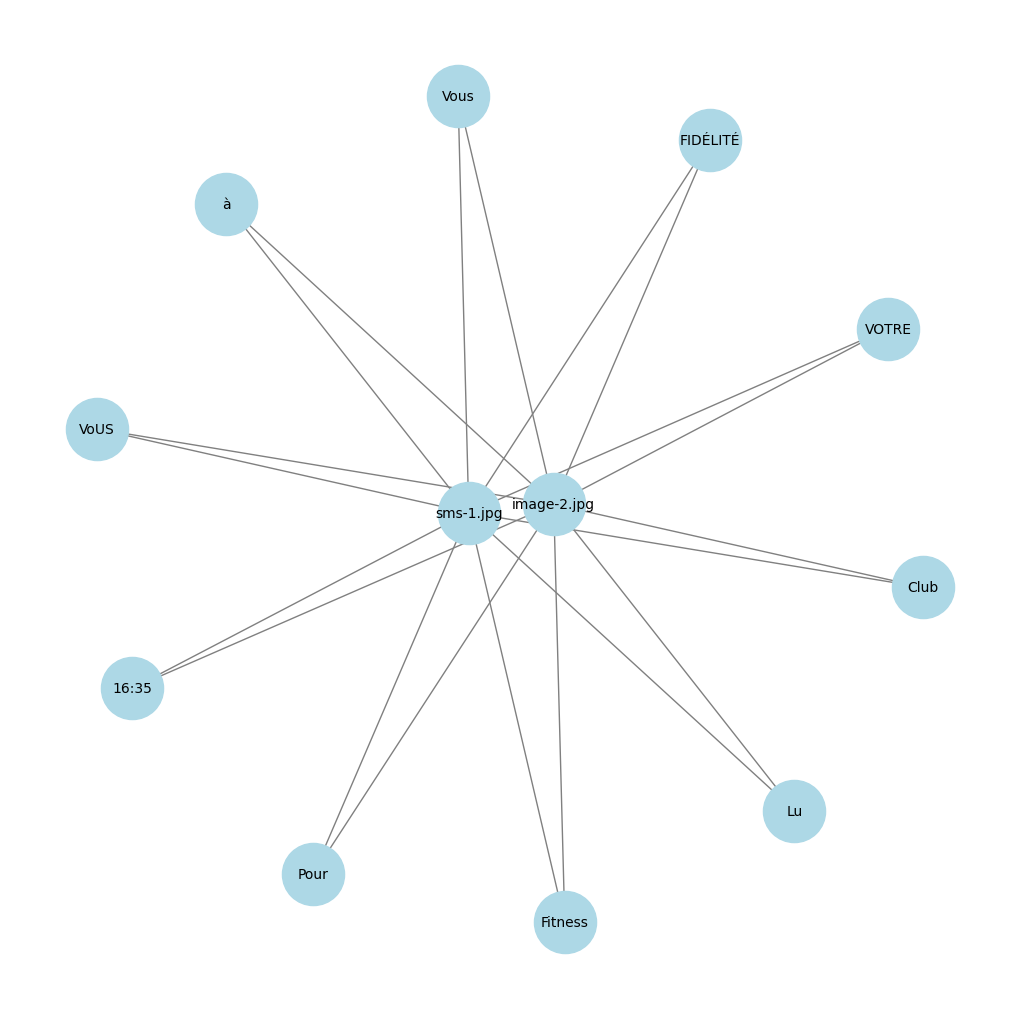

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import easyocr
import spacy
nlp = spacy.load("en_core_web_sm")


def ocr(img)-> str:
    reader = easyocr.Reader(['fr', 'fr'])
    result = reader.readtext('sms-1.jpg', detail = 0, paragraph=True)
    # return result
    return ' '.join(result)

def ner(txt:str)->str:
    doc = nlp(txt)
    lst  = []
    for ent in doc.ents:
        print(ent.text, ent.label_)
        if ent.label_ == 'PERSON':
            # lst.append(ent.text)
            lst.append(ent.lemma_)
        if ent.label_ == 'ORG':
            # lst.append(ent.text)
            lst.append(ent.lemma_)
        if ent.label_ == 'LOC':
            # lst.append(ent.text)
            lst.append(ent.lemma_)
        if ent.label_ == 'DATE':
            lst.append(ent.lemma_)
    
    return ' '.join(lst)
    
    
def extract_info_from_images(image_paths):
    image_info = {}
    for img_path in image_paths:
        text = ocr(img_path)
        res = ner(text)
        image_info[img_path] = res
    return image_info

def create_graph(image_info):
    G = nx.Graph()
    for image, text in image_info.items():
        words = text.split()
        for word in words:
            G.add_edge(image, word)
    return G

def plot_graph(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
    plt.show(block=True)  # Ensure the graph is shown

# Exemple d'utilisation
image_paths = ['sms-1.jpg', 'image-2.jpg']  # Liste des chemins vers les images
image_info = extract_info_from_images(image_paths)
graph = create_graph(image_info)
plot_graph(graph)